# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.


### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

In [55]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [32]:
# number of callbacks for black-sounding names
print(np.sum(data[data.race=='b'].call))
# number of callbacks for white-sounding names
print(np.sum(data[data.race=='w'].call))

print(len(data[data.race=='w']))
print(len(data[data.race=='b']))
len(data)

157.0
235.0
2435
2435


4870

In [34]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [90]:
w = data[data.race=='w']
b = data[data.race=='b']
# probabilites of getting a call back
pr_w = np.sum(w.call) / len(w)
pr_b = np.sum(b.call) / len(b)
print(pr_w)
print(pr_b)
percent_diff = ((pr_w - pr_b) / pr_b) *100
print(percent_diff)

0.0965092402464
0.064476386037
49.6815286624


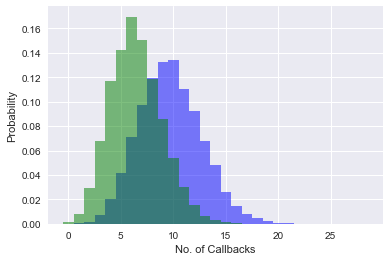

9.6845
6.4445


In [93]:
# plot callback distributions for white and black
w_call = np.random.binomial(n=100, p=pr_w, size=10000)
b_call = np.random.binomial(n=100, p=pr_b, size=10000)
bins_n_w = np.arange(0, max(w_call) + 4) - 0.5
bins_n_b = np.arange(0, max(b_call) + 4) - 0.5
plt.hist(w_call, bins=bins_n_w, normed=True, color='blue', alpha=0.5)
plt.hist(b_call, bins=bins_n_b, normed=True, color='green', alpha=0.5)
plt.xlabel('No. of Callbacks')
plt.ylabel('Probability')
plt.show()
print(np.mean(w_call))
print(np.mean(b_call))


### 1. What test is appropriate for this problem? Does CLT apply?
Given a large number of samples, assuming that the samples represent the population, and that they drawn independently, then the Central Limit Theorem applies. Also, given two proportions, we can compare the two to see if they are the same using the *z-test*.



### 2. What are the null and alternate hypotheses?
**HO**: race has no significant impact on callbacks. Probabilities are equal

**HA**: race has a significant impact on callbacks. Probabilities are NOT equal

Alpha = 0.05

z-value = (phat1 - phat2) - 0 / sqrt[ phat(1-phat)(1/n1 + 1/n2 ]


### 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [78]:
# probability difference
pr_diff = pr_w - pr_b
print(pr_diff)

# probability of getting a callback
phat = (np.sum(w.call) + np.sum(b.call)) / (len(w) + len(b))

# z-score
z = pr_diff / np.sqrt( phat * (1-phat) * ( (1/len(w)) + (1/len(b)) ) )
print('z-score:', z)
# p_val, multiply by 2 for two-tail test
p_value = stats.norm.cdf(-z)*2
print('p-value:', p_value)
z_critical = stats.norm.ppf(q = 0.975)
print('z-critical:', z_critical)

0.0320328542094
z-score: 4.10841215243
p-value: 3.98388683759e-05
z-critical: 1.95996398454


The combination of z-value and p-value would indicate that the null hypothesis must be rejected. Now we have evidence of the fact that race has a *significant* impact on callbacks.

In [80]:
n1 = len(w)
n2 = len(b)
margin_err = 1.96 * np.sqrt(phat * (1 - phat) * ((1 / n1) + (1 / n2)))
print('margin of error:', margin_err)
conf_int = pr_diff + np.array([-1, 1]) * margin_err
print('confidence interval:', conf_int)

margin of error: 0.0152819123109
confidence interval: [ 0.01675094  0.04731477]


In [84]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

# create permuation samples and calculate difference between their means
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [89]:
wht = data[data.race=='w'].call.values
blk = data[data.race=='b'].call.values

mean_diff = diff_of_means(wht, blk)
print(mean_diff)
permutation_reps = draw_perm_reps(wht, blk, diff_of_means, size=10000)
p_val = np.sum(permutation_reps > mean_diff) / len(permutation_reps)
print('p_value=', p_val)
conf_int95 = np.percentile(permutation_reps, [2.5, 97.5])
print('confidence interval:', conf_int)

0.0320329
p_value= 0.0
confidence interval: [ 0.01675094  0.04731477]


By using permutations, we resample the data and compute the probability (p-value) of obtaining a difference in means (0.03) as being zero. This rejects the null hypothesis that race doesn't have any impact on the rate of callbacks. This further proves that race has a significant impact on callbacks.

### 4. Write a story describing the statistical significance in the context or the original problem.

Racial discrimination is widespread in various cultures as well as in the labor markets. This phenomena has been studied in the United States labor market where the researchers randomly assigned identical resumes to black-sounding and white-sounding names. After analyzing the data of such study, there is overwhelming statistical evidence which indicates that there is correlation between the amount of callbacks and the individual's race. Unfortunately, black-sounding names receive less callbacks than white-sounding names. In this particular study, white-sounding names were 50% more likely to receive a callback. Race is definitely not the only deciding factor, but it does present to be an obstacle to hard working individuals who may, at minimum, qualify for a callback. Perhaps, employers should focus on the credentials of the individual and make their decision before even looking at the person's name. This would, in theory, help eliminate discrimination based on race.

### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

By no means is race the most important factor in callback decision. Most likely, there are numerous factors that come in to play when deciding on which individual to callback for an interview. These factors whould need to be tested just as the race factor was tested earlier. Each factor can be tested for the rate of callbacks to identify statistical significance, if any.